In [34]:
#CLEAN (non hate):0, OFFENSIVE:1 and HATE:2

In [35]:
!pip install tensorflow

In [36]:
!pip install pyvi

In [37]:
import pandas as pd
import re
import string
import numpy as np

In [38]:
train = pd.read_csv('train.csv')
train.head()

,free_text,label_id
0,Em được làm fan cứng luôn rồi nè ❤️ reaction q...,0
1,Đúng là bọn mắt híp lò xo thụt :))) bên việt n...,2
2,Đậu Văn Cường giờ giống thằng sida hơn à,0
3,CÔN ĐỒ CỤC SÚC VÔ NHÂN TÍNH ĐỀ NGHI VN. NHÀ NƯ...,2
4,Từ lý thuyết đến thực hành là cả 1 câu chuyện ...,0


In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24048 entries, 0 to 24047
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   free_text  24046 non-null  object
 1   label_id   24048 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 375.9+ KB


In [40]:
test = pd.read_csv('test.csv')
test.head()

,free_text,label_id
0,Đừng cố biện minh =)))) choi lon,0
1,Haizz. Nthe này thì dân khổ quá,1
2,the nay ma chi phat gay roi trat tu cong cong ...,0
3,Mua cho em hộp bcs mĩ sài cho oai :)),0
4,coin card :3,1


In [41]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6680 entries, 0 to 6679
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   free_text  6680 non-null   object
 1   label_id   6680 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 104.5+ KB


#Defining a function to return a clean text

In [42]:
# def cleaning_text(df, text_field):
#   df[text_field] = df[text_field].str.lower()
#   df[text_field] = df[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?","", elem))
#   return df

In [43]:
#test_clean = cleaning_text(test,"free_text")
#train_clean = cleaning_text(train, "free_text")

In [44]:
def preprocessing(line):
  # từ viết thường
  line = line.lower()
  # bỏ dấu câu
  translation_table = str.maketrans(" ", " ", string.punctuation)
  line = line.translate(translation_table)
  line = line.replace("“", " ")
  line = line.replace("”", " ")
  # Bỏ kí tự số
  line = re.sub(r'\d+', '', line)
  # Bỏ các khoảng trống thừa
  line = line.strip()
  while line.find("  ") != -1:
      line = line.replace("  ", " ")
  return line

In [45]:
train.head()

,free_text,label_id
0,Em được làm fan cứng luôn rồi nè ❤️ reaction q...,0
1,Đúng là bọn mắt híp lò xo thụt :))) bên việt n...,2
2,Đậu Văn Cường giờ giống thằng sida hơn à,0
3,CÔN ĐỒ CỤC SÚC VÔ NHÂN TÍNH ĐỀ NGHI VN. NHÀ NƯ...,2
4,Từ lý thuyết đến thực hành là cả 1 câu chuyện ...,0


In [46]:
test.head()

,free_text,label_id
0,Đừng cố biện minh =)))) choi lon,0
1,Haizz. Nthe này thì dân khổ quá,1
2,the nay ma chi phat gay roi trat tu cong cong ...,0
3,Mua cho em hộp bcs mĩ sài cho oai :)),0
4,coin card :3,1


In [47]:
X_array = train['free_text'].values
Y_array = train['label_id'].values

In [48]:
x = []
y = []

for i, j in zip(X_array, Y_array):
    if isinstance(i, str):
        x.append(i)
        y.append(j)

In [49]:
print(x)

['Em được làm fan cứng luôn rồi nè ❤️ reaction quá hay quá cute coi mấy giờ này quá hợp lí =]]]', 'Đúng là bọn mắt híp lò xo thụt :))) bên việt nam t cái này ra cách đây 10 năm r và bọn t gọi là cái L :)))', 'Đậu Văn Cường giờ giống thằng sida hơn à', 'CÔN ĐỒ CỤC SÚC VÔ NHÂN TÍNH ĐỀ NGHI VN. NHÀ NƯỚC VN BAN THƯỞNG.', 'Từ lý thuyết đến thực hành là cả 1 câu chuyện dài =))', 'Coronavirus is manmade', 'Đố chúng m nhận ra ai', 'Lúp lúp như chó .', '🥰🥰🥰', 'Thế mà mình nói mấy thằng bắc kì, bọn đó lại bâu vô nói mình phân biệt!:D', 'Được anh ưi, lâu rồi không nghe phúc du rap 🤣', 'Cắt cho trẻ trâu bớt thui mà 😂😂😂', 'Nghe rất vô lí nhưng cực kì thuyết phục', 'chán ghê hong có pé 2 mới máu được, hâhha', 'Sao t gửi đc bây', 'thế đấy. làm j bọn nó. bọn nó có quyền nên làm j chả được :v', 'Loại này cho dựa cột thôi chứ độ thế nào', 'Thuong wa di', 'Dạy bơi cho cá. Bơi thì đương nhiên nó bơi được vì nó là cá. Làm sao cho nó sống được mới là điều người dân đang quan tâm.', 'Ủa chứ bữa xin lỗi khóc 

In [50]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pickle

In [51]:

# Text vectorization
vocabulary_size = 10000
sequence_length = 100

embedding_dim = 300
batch_size = 256
epochs = 40
drop = 0.5

filter_sizes = [2,3,5]
num_filters = 32

vectorization_layer = tf.keras.layers.TextVectorization(
    max_tokens=vocabulary_size,
    encoding='utf-8',
    output_sequence_length=sequence_length
)
vectorization_layer.adapt(x)
vectorization_config = vectorization_layer.get_config()
vocabulary = vectorization_layer.get_vocabulary()
with open('vectorization_config.pkl', 'wb') as f:
    pickle.dump({'vocabulary': vocabulary, 'config': vectorization_layer.get_config()}, f)

In [52]:
input = vectorization_layer(x)
output = tf.convert_to_tensor(y)
input = input.numpy()
output = output.numpy()
print("Shape of x:", input.shape)
print("Shape of y:", output.shape)

Shape of x: (24046, 100)
Shape of y: (24046,)


In [53]:
x_train, x_temp, y_train, y_temp = train_test_split(input, output, test_size=0.2, random_state=42, stratify=output)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)
print("Number of training data:", y_train.shape)
print("Number of validate data:", y_val.shape)
print("Number of testing data:", y_test.shape)

Number of training data: (19236,)
Number of validate data: (2405,)
Number of testing data: (2405,)


In [54]:
def model_RNN_simple(sequence_length, num_class, num_words, embedding_dim, num_filters, filter_sizes, drop):
    inputs = tf.keras.layers.Input(shape=(sequence_length,), dtype='int32')
    embedding = tf.keras.layers.Embedding(input_dim=num_words, output_dim=embedding_dim, input_length=sequence_length)(inputs)
    reshape = tf.keras.layers.Reshape((sequence_length,embedding_dim,1))(embedding)

    conv_0 = tf.keras.layers.Conv2D(num_filters, kernel_size=(filter_sizes[0], embedding_dim), padding='valid', kernel_initializer='normal', activation='elu')(reshape)
    conv_1 = tf.keras.layers.Conv2D(num_filters, kernel_size=(filter_sizes[1], embedding_dim), padding='valid', kernel_initializer='normal', activation='elu')(reshape)
    conv_2 = tf.keras.layers.Conv2D(num_filters, kernel_size=(filter_sizes[2], embedding_dim), padding='valid', kernel_initializer='normal', activation='elu')(reshape)

    maxpool_0 = tf.keras.layers.MaxPool2D(pool_size=(sequence_length - filter_sizes[0] + 1, 1), strides=(1,1), padding='valid')(conv_0)
    maxpool_1 = tf.keras.layers.MaxPool2D(pool_size=(sequence_length - filter_sizes[1] + 1, 1), strides=(1,1), padding='valid')(conv_1)
    maxpool_2 = tf.keras.layers.MaxPool2D(pool_size=(sequence_length - filter_sizes[2] + 1, 1), strides=(1,1), padding='valid')(conv_2)

    concatenated_tensor = tf.keras.layers.Concatenate(axis=1)([maxpool_0, maxpool_1, maxpool_2])
    flatten = tf.keras.layers.Flatten()(concatenated_tensor)
    dropout = tf.keras.layers.Dropout(drop)(flatten)
    output = tf.keras.layers.Dense(units=3, activation='softmax')(dropout)

    # this creates a model that includes
    model = tf.keras.models.Model(inputs=inputs, outputs=output)
    return model

In [55]:
model = model_RNN_simple(sequence_length, 3, 10000, embedding_dim, num_filters, filter_sizes, drop)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 100)]                0         []                            
                                                                                                  
 embedding_1 (Embedding)     (None, 100, 300)             3000000   ['input_2[0][0]']             
                                                                                                  
 reshape_1 (Reshape)         (None, 100, 300, 1)          0         ['embedding_1[0][0]']         
                                                                                                  
 conv2d_3 (Conv2D)           (None, 99, 1, 32)            19232     ['reshape_1[0][0]']           
                                                                                            

In [56]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=256, epochs = 40, verbose=1, validation_data=(x_val, y_val)).history

Epoch 1/40
76/76 [==============================] - 11s 121ms/step - loss: 0.5622 - accuracy: 0.8289 - val_loss: 0.4327 - val_accuracy: 0.8511
Epoch 2/40
76/76 [==============================] - 6s 80ms/step - loss: 0.3636 - accuracy: 0.8677 - val_loss: 0.3496 - val_accuracy: 0.8790
Epoch 3/40
76/76 [==============================] - 5s 66ms/step - loss: 0.2692 - accuracy: 0.9014 - val_loss: 0.3506 - val_accuracy: 0.8786
Epoch 4/40
76/76 [==============================] - 3s 44ms/step - loss: 0.2111 - accuracy: 0.9250 - val_loss: 0.3627 - val_accuracy: 0.8761
Epoch 5/40
76/76 [==============================] - 4s 48ms/step - loss: 0.1626 - accuracy: 0.9443 - val_loss: 0.3866 - val_accuracy: 0.8715
Epoch 6/40
76/76 [==============================] - 2s 28ms/step - loss: 0.1271 - accuracy: 0.9570 - val_loss: 0.4250 - val_accuracy: 0.8723
Epoch 7/40
76/76 [==============================] - 2s 29ms/step - loss: 0.1032 - accuracy: 0.9672 - val_loss: 0.4574 - val_accuracy: 0.8665
Epoch 8/40


<Figure size 1000x1000 with 0 Axes>

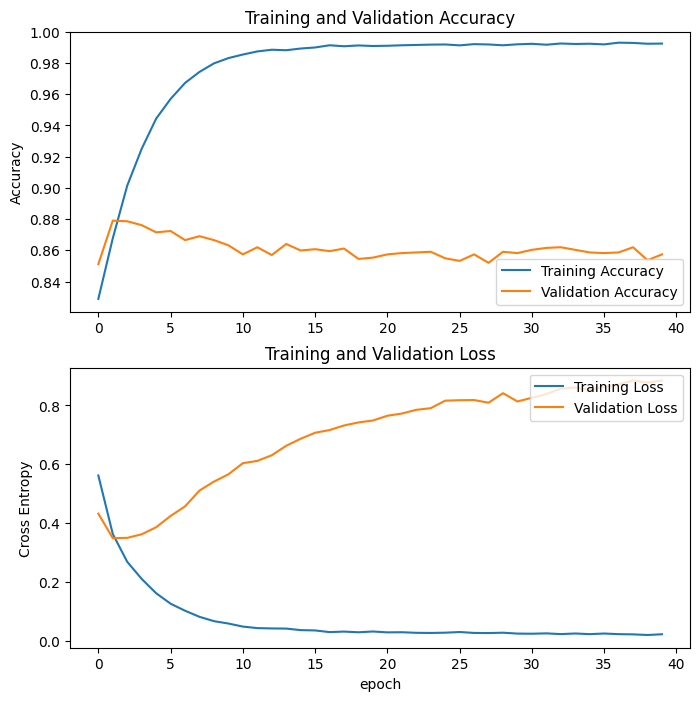

In [57]:
plt.figure(figsize=(10, 10))

acc = history['accuracy']
val_acc = history['val_accuracy']

loss = history['loss']
val_loss = history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [58]:
test_loss, test_acc = model.evaluate(x_test, y_test, batch_size=128)
print("test loss:", test_loss)
print("test accuracy:", test_acc)

19/19 [==============================] - 0s 4ms/step - loss: 0.8774 - accuracy: 0.8507
test loss: 0.8774265646934509
test accuracy: 0.8507276773452759


In [59]:
tests = ["chào cậu "]
process_tests = [preprocessing(i) for i in tests]
x = vectorization_layer(process_tests)

In [60]:
y_pred = np.argmax(model.predict(x), axis=1)

1/1 [==============================] - 0s 83ms/step


In [61]:
print(y_pred)

[0]


In [62]:
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [63]:
model.save('my_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [65]:
from google.colab import files
files.download('model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>